In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#from matplotlib import style
from sklearn import preprocessing, cross_validation, svm, tree
from sklearn import linear_model 

devel=pd.read_csv('ComParE2017_devel.csv')
train=pd.read_csv('ComParE2017_train.csv')

train.head() 

X_tr = np.array(train.drop(['y'], 1))
X_dev = np.array(devel.drop(['y'], 1))
X_tr = preprocessing.scale(X_tr)
X_dev = preprocessing.scale(X_dev)
#df.fillna(value=-99999, inplace=True)
#df.dropna(inplace=True)
y_tr = np.array(train['y'])
y_dev = np.array(devel['y'])


# X_comb = np.concatenate((X_tr,X_dev))
# y_comb = np.concatenate((y_tr,y_dev))

# X_comb = np.concatenate(X_tr,X_dev)
# y_comb = np.concatenate(y_tr,y_dev)

In [35]:
# from sklearn.decomposition import PCA as sklearnPCA

# sklearn_pca = sklearnPCA(n_components=50)
# PCA_TR = sklearn_pca.fit_transform(X_tr)

# sklearn_pca = sklearnPCA(n_components=50)
# PCA_DV = sklearn_pca.fit_transform(X_dev)

# TR1=np.ones([len(PCA_TR),1])
# DV0=np.zeros([len(PCA_DV),1])
# ALL_T=np.concatenate((TR1, DV0), axis=0)
# ALL=np.concatenate((PCA_TR, PCA_DV), axis=0)
# ALL.shape

In [81]:
# Logistic regression

from sklearn.metrics import confusion_matrix, recall_score

logist=linear_model.LogisticRegression(C=0.00009,penalty='l2')
logist.fit(X_tr,y_tr)

tr_acc=logist.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, logist.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, logist.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=logist.score(X_dev,y_dev)
dv_conf=confusion_matrix(y_dev, logist.predict(X_dev), labels=None)
dv_rc=recall_score(y_dev, logist.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

print(tr_acc,dv_acc,tr_rc,dv_rc,dv_conf)

0.79422768573 0.602816901408 0.818055555556 0.607456140351 [[ 831  537]
 [ 873 1309]]


In [79]:
# Elastic net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01, l1_ratio=0.7)
enet.fit(X_tr,y_tr)

# tr_acc=logist.score(X_tr,y_tr)
# tr_conf=confusion_matrix(y_tr, logist.predict(X_tr), labels=None)
# tr_rc=recall_score(y_tr, logist.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
# dv_acc=logist.score(X_dev,y_dev)
dv=confusion_matrix(y_dev, enet.predict(X_dev), labels=None)
# dv_rc=recall_score(y_dev, enet.predict(X_dev))
print(dv,tr_conf)

ValueError: Can't handle mix of binary and continuous

In [52]:
# Logistic regression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score

logist=linear_model.LogisticRegression(C=0.001)
scores=cross_val_score(logist, X_tr, y_tr, cv=5)
predicted = cross_val_predict(logist, X_dev, Y_dev, cv=5)
metrics.accuracy_score(iris.target, predicted) 

# tr_acc=logist.score(X_tr,y_tr)
# tr_conf=confusion_matrix(y_tr, logist.predict(X_tr), labels=None)
# tr_rc=recall_score(y_tr, logist.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
# dv_acc=logist.score(X_dev,y_dev)
# dv_conf=confusion_matrix(y_dev, logist.predict(X_dev), labels=None)
# dv_rc=recall_score(y_dev, logist.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

# print(tr_acc,dv_acc,tr_rc,dv_rc,recall)

NameError: name 'score' is not defined

In [110]:
# Linear SVM

from sklearn import svm

svm=svm.SVC(kernel='linear', C=0.001, probability=True,
                                 random_state=0)
svm.fit(X_tr,y_tr)
tr_acc=svm.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, svm.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, svm.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=svm.score(X_dev,y_dev)
dv_conf=confusion_matrix(y_dev, svm.predict(X_dev), labels=None)
dv_rc=recall_score(y_dev, svm.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

print(tr_acc,dv_acc,tr_rc,dv_rc,dv_conf)

0.942009620524 0.619718309859 0.904166666667 0.470760233918 [[ 644  724]
 [ 626 1556]]


In [86]:
# poly SVM

from sklearn import svm

svmp=svm.SVC(kernel='poly', C=0.0001, probability=True,degree =2,
                                 random_state=0)
svmp.fit(X_tr,y_tr)
tr_acc=svmp.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, svmp.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, svmp.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=svmp.score(X_dev,y_dev)
dv_conf=confusion_matrix(y_dev, svmp.predict(X_dev), labels=None)
dv_rc=recall_score(y_dev, svmp.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

print(tr_acc,dv_acc,tr_rc,dv_rc)

0.615179048637 0.614647887324 0.0 0.0


In [108]:
#MLP

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=3,activation='relu', solver='sgd',learning_rate_init=0.01,max_iter=50)
mlp.fit(X_tr, y_tr)
tr_acc=mlp.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, mlp.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, mlp.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=mlp.score(X_dev,y_dev)
dv_conf=confusion_matrix(y_dev, mlp.predict(X_dev), labels=None)
dv_rc=recall_score(y_dev, mlp.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

print(tr_acc,dv_acc,tr_rc,dv_rc,dv_conf)

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:561: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


0.977819347942 0.600563380282 0.942361111111 0.538011695906 [[ 736  632]
 [ 786 1396]]


In [115]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=1000)
PCA_TR_40 = sklearn_pca.fit_transform(X_tr)

print (sklearn_pca.explained_variance_ratio_.cumsum())

# PCA_DV_40 = sklearn_pca.transform(X_dev)



[ 0.13318392  0.18805509  0.2260066   0.25770818  0.28027863  0.29749124
  0.31457299  0.33013538  0.34274662  0.35365655  0.36372209  0.37321547
  0.38148822  0.38937357  0.39717725  0.40430604  0.4107765   0.41700564
  0.42311823  0.42871517  0.43412208  0.4393302   0.44422322  0.44888353
  0.45340452  0.45752049  0.46144392  0.46524073  0.4689201   0.47248734
  0.47594367  0.47931682  0.48253757  0.48564098  0.4886702   0.49162587
  0.49450953  0.49724219  0.49995507  0.5026555   0.50532538  0.50790064
  0.51045484  0.51290608  0.51533869  0.51770873  0.52003022  0.52229506
  0.52450987  0.52670629  0.5288347   0.53092631  0.53301136  0.53505038
  0.53705826  0.53903811  0.54098007  0.54287779  0.54476489  0.54661097
  0.54842932  0.5502411   0.55201207  0.55375502  0.55546818  0.55717919
  0.55887098  0.56054111  0.56219533  0.56383434  0.56545572  0.56706688
  0.56865467  0.57020926  0.57175287  0.57327989  0.57479526  0.57630542
  0.57778317  0.57925936  0.58071839  0.5821636   0

In [130]:
PCA_DV_40 = sklearn_pca.transform(X_dev)

from sklearn.metrics import confusion_matrix, recall_score
from sklearn import preprocessing, cross_validation, svm, tree
from sklearn import linear_model 

logist=linear_model.LogisticRegression(C=0.000086,penalty='l2')
logist.fit(PCA_TR_40,y_tr)

tr_acc=logist.score(PCA_TR_40,y_tr)
tr_conf=confusion_matrix(y_tr, logist.predict(PCA_TR_40), labels=None)
tr_rc=recall_score(y_tr, logist.predict(PCA_TR_40), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=logist.score(PCA_DV_40,y_dev)
dv_conf=confusion_matrix(y_dev, logist.predict(PCA_DV_40), labels=None)
dv_rc=recall_score(y_dev, logist.predict(PCA_DV_40), labels=None, pos_label=0, average='binary', sample_weight=None)

print(tr_acc,dv_acc,tr_rc,dv_rc,dv_conf)

0.784339925174 0.601690140845 0.809027777778 0.606725146199 [[ 830  538]
 [ 876 1306]]


In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score

eclf = VotingClassifier(estimators=[('lg', logist), ('ml', mlp)],  voting='hard')

for clf, label in zip([logist, mlp,eclf], ['Logistic Regression','MLP','Ensemble']):
    scores = cross_val_score(clf, X_dev, y_dev,  scoring='recall')
    print("Recall: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Recall: 0.64 (+/- 0.02) [Logistic Regression]
Recall: 0.78 (+/- 0.01) [MLP]
Recall: 0.62 (+/- 0.02) [Ensemble]


In [89]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01, l1_ratio=0.7)
enet.fit(X_tr,y_tr)

tr_acc=enet.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, enet.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, enet.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
# dv_acc=logist.score(X_dev,y_dev)
# dv=confusion_matrix(y_dev, enet.predict(X_dev), labels=None)
# dv_rc=recall_score(y_dev, enet.predict(X_dev))
print(tr_rc,enet.predict(X_dev))

ValueError: Can't handle mix of binary and continuous

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score

eclf = VotingClassifier(estimators=[('lg', logist), ('ml', mlp)],  voting='hard')

mlp.fit(X_tr, y_tr)
tr_acc=mlp.score(X_tr,y_tr)
tr_conf=confusion_matrix(y_tr, mlp.predict(X_tr), labels=None)
tr_rc=recall_score(y_tr, mlp.predict(X_tr), labels=None, pos_label=0, average='binary', sample_weight=None)
dv_acc=mlp.score(X_dev,y_dev)
dv_conf=confusion_matrix(y_dev, mlp.predict(X_dev), labels=None)
dv_rc=recall_score(y_dev, mlp.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)

In [48]:
lg=recall_score(y_dev, logist.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)
ml=recall_score(y_dev, mlp.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)
eclf.fit(X_tr, y_tr)
en=recall_score(y_dev, eclf.predict(X_dev), labels=None, pos_label=0, average='binary', sample_weight=None)
print(lg,ml,en)

0.55701754386 0.477339181287 0.589912280702


In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score

eclf = VotingClassifier(estimators=[('lg', logist), ('ml', mlp)],  voting='hard')

for clf, label in zip([logist, svm,mlp,eclf], ['Logistic Regression','MLP','Ensemble']):
    scores = cross_val_score(clf, X_tr, y_tr, cv=5, scoring='recall')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.75 (+/- 0.02) [Logistic Regression]


KeyboardInterrupt: 

In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.cross_validation import cross_val_score

eclf = VotingClassifier(estimators=[('lg', logist), ('sv', svm),('ml', mlp)],  voting='hard')

for clf, label in zip([logist, svm,mlp,eclf], ['Logistic Regression', 'SVM','MLP','Ensemble']):
    scores = cross_val_score(clf, X_dev, y_dev, cv=5, scoring='recall')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.65 (+/- 0.02) [Logistic Regression]


KeyboardInterrupt: 

In [ ]:
from brew.base import Ensemble, EnsembleClassifier
brew.combination.combiner import Combiner 
 
# create your Ensemble clf1 can be an EnsembleClassifier object too
ens = Ensemble(classifiers=[logist, svm]) 
 
# create your Combiner (combination rule)
# it can be 'min', 'max', 'majority_vote' ...
cmb = Combiner(rule='mean')
 
# and now, create your Ensemble Classifier
ensemble_clf = EnsembleClassifier(ensemble=ens, combiner=cmb)
 
# assuming you have a X, y data you can use
ensemble_clf.fit(X_tr, y_tr)
y_pred=ensemble_clf.predict(X_dev)
y_prob=ensemble_clf.predict_proba(X_dev)

ens_tr_acc=ensemble_clf.score(X_tr,y_tr)

print(y_pred,y_prob,ens_tr_acc)
 
# # creating a new ensemble of ensembles
# ens = Ensemble(classifiers=[clf1,ensemble_clf])
# ensemble_ens = EnsembleClassifier(ensemble=ens, combiner=cmb)
 
# # and you can use it in the same way as a regular ensemble
# ensemble_ens.fit(X, y)
# ensemble_ens.predict(X)
# ensemble_ens.predict_proba(X)

In [ ]:
from sklearn import tree
from sklearn.matrix import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr, Y_tr)
clf.predict(X_dev,y_dev)
tree_acc=accuracy_score(y_dev,)

In [16]:
logist.score(X_tr,y_tr)

1.0

In [33]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=3,learning_rate=100).fit_transform(ALL)
# figure(figsize=(10, 5))
# subplot(121)
# scatter(X_tsne[:, 0], X_tsne[:, 1], c=ALL_T)



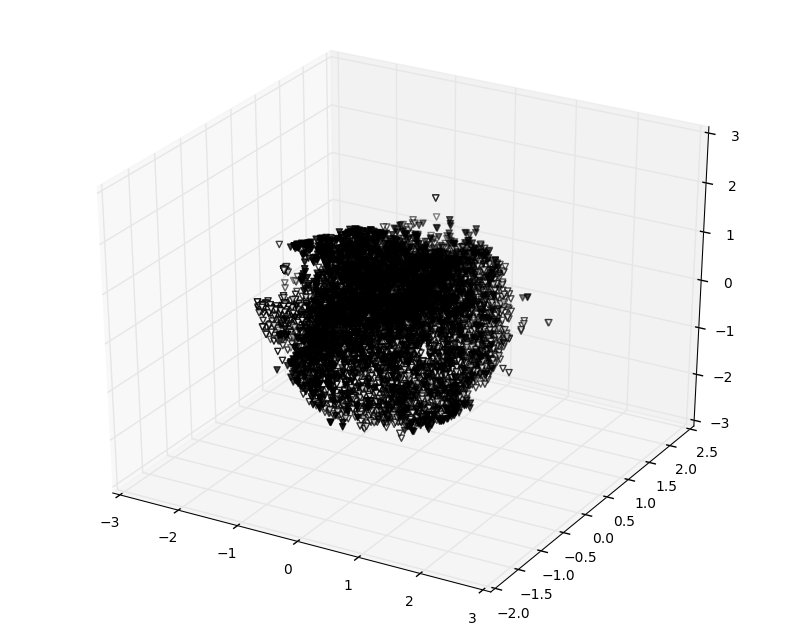

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2], c=ALL_T , marker='v')
# Axes3D.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2], c=ALL_T,depthshade=True)

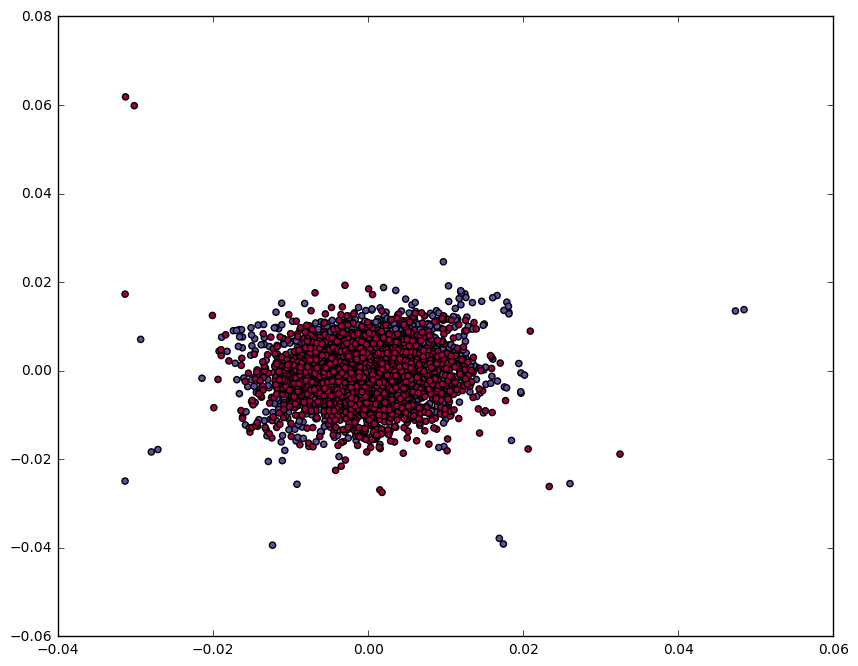

In [62]:
X_tsne = TSNE(n_components=2,learning_rate=100).fit_transform(ALL)


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=ALL_T,cmap=plt.cm.Spectral)

In [17]:
from sklearn.cross_validation import KFold
from sklearn import cross_validation

kf = KFold(3742, n_folds=5,shuffle=True)

kf_train_acc=[]
kf_val_acc=[]
D = X_tr.shape[1] #Number of features
K = max(y_tr)+1 

# Linear model

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# Initial values from hyperparameter
reg = 1e-3 # regularization strength

#Initial value for the Gradient Descent Parameter
step_size = 1e-2 #Also called learning rate

#For simplicity, we will not hand tune this algorithm parameter as well.

for train_index, val_index in kf:
#     print("TRAIN:", train_index, "VAL:", val_index)
    X_train, X_val = X_tr[train_index], X_tr[val_index]
    y_train, y_val = y_tr[train_index], y_tr[val_index]
    num_examples = X_train.shape[0]
    
    for i in range(100):

        # evaluate class scores, [N x K]
        scores = np.dot(X_train, W) + b 

        # compute the class probabilities
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

        # compute the loss: average cross-entropy loss and regularization
        corect_logprobs = -np.log(probs[range(num_examples),y_train])
        data_loss = np.sum(corect_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W*W)
        loss = data_loss + reg_loss
        if i % 250 == 0:
            print("iteration:",i, " loss:",loss)

        # compute the gradient on scores
        dscores = probs
        dscores[range(num_examples),y_train] -= 1
        dscores /= num_examples

        # backpropate the gradient to the parameters (W,b)
        dW = np.dot(X_train.T, dscores)
        db = np.sum(dscores, axis=0, keepdims=True)

        dW += reg*W # regularization gradient

        # perform a parameter update
        W += -step_size * dW
        b += -step_size * db
    scores = np.dot(X_train, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("train accuracy:",(np.mean(predicted_class == y_train)))
    kf_train_acc.append(np.mean(predicted_class == y_train))
    
    scores = np.dot(X_val, W) + b
    predicted_class = np.argmax(scores, axis=1)
    print("val accuracy:",(np.mean(predicted_class == y_val)))
    kf_val_acc.append(np.mean(predicted_class == y_val))

print("cross validation-train acc:",np.mean(kf_train_acc),"cross validation-val acc:",np.mean(kf_val_acc))

iteration: 0  loss: 0.859444917982
train accuracy: 0.875041764116
val accuracy: 0.731642189586
iteration: 0  loss: 0.386458338967
train accuracy: 0.908118944203
val accuracy: 0.794392523364
iteration: 0  loss: 0.313452130833
train accuracy: 0.927187708751
val accuracy: 0.851604278075
iteration: 0  loss: 0.267446730714
train accuracy: 0.941883767535
val accuracy: 0.886363636364
iteration: 0  loss: 0.239923501793
train accuracy: 0.949899799599
val accuracy: 0.917112299465
cross validation-train acc: 0.920426396841 cross validation-val acc: 0.836222985371


In [10]:
scores = np.dot(X_dev, W) + b
predicted_class_dv = np.argmax(scores, axis=1)
print("devel accuracy:",(np.mean(predicted_class_dv == y_dev)))

devel accuracy: 0.591830985915


In [21]:
scores = np.dot(X_train, W) + b
predicted_class_tr = np.argmax(scores, axis=1)
print("train accuracy:",(np.mean(predicted_class_tr == y_train)))

train accuracy: 0.947087119188


In [22]:
from sklearn.metrics import recall_score
b=recall_score(y_train, predicted_class_tr, labels=None, pos_label=0, average='binary', sample_weight=None)
b

0.93680555555555556

In [25]:
b=recall_score(y_val, predicted_class_vl, labels=None, pos_label=0, average='binary', sample_weight=None)
b

0.51169590643274854

In [15]:
from sklearn.metrics import confusion_matrix
scores = np.dot(X_tr, W) + b
predicted_class_tn = np.argmax(scores, axis=1)
a=confusion_matrix(y_tr, predicted_class_tn, labels=None)
a

array([[1395,   45],
       [  41, 2261]])

In [16]:
from sklearn.metrics import confusion_matrix
scores = np.dot(X_dev, W) + b
predicted_class_dv = np.argmax(scores, axis=1)
a=confusion_matrix(y_dev, predicted_class_dv, labels=None)
a

array([[ 687,  681],
       [ 743, 1439]])